In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Original Training Data Shape: (60000, 28, 28)
Original Data Type: uint8


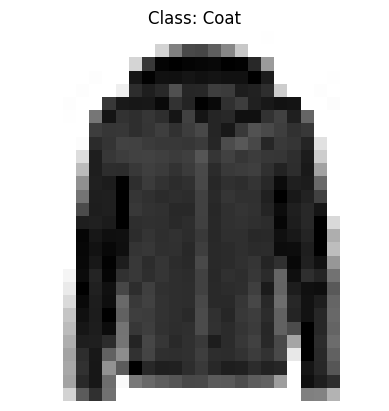

In [3]:
# DATA EXPLORATION AND PREPROCESSING

# Check the shape and data type
print("Original Training Data Shape:", X_train_full.shape) # Should be (60000, 28, 28)
print("Original Data Type:", X_train_full.dtype)     # Should be uint8

# Create a validation set and scale the data
# The first 5000 images are for validation, the rest for training.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0 # Also scale the test set

# Define class names for plotting
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Let's look at a sample image
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.title(f"Class: {class_names[y_train[0]]}")
plt.show()

In [4]:
# NEURAL NETWORK ARCHITECTURE

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    # Input Layer: Flattens the 28x28 image into a 1D array of 784 pixels
    keras.layers.Flatten(input_shape=[28, 28]),

    # Hidden Layer 1: 300 neurons with ReLU activation
    keras.layers.Dense(300, activation="relu"),

    # Hidden Layer 2: 100 neurons with ReLU activation
    keras.layers.Dense(100, activation="relu"),

    # Output Layer: 10 neurons (one for each class) with Softmax activation
    keras.layers.Dense(10, activation="softmax")
])

# print a summary of the model
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 6. TRAIN THE MODEL
# ------------------
# This will train the model and store the training history
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6893 - loss: 0.9919 - val_accuracy: 0.8178 - val_loss: 0.5262
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8254 - loss: 0.5019 - val_accuracy: 0.8406 - val_loss: 0.4606
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8404 - loss: 0.4495 - val_accuracy: 0.8510 - val_loss: 0.4267
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8499 - loss: 0.4204 - val_accuracy: 0.8572 - val_loss: 0.4051
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8581 - loss: 0.3994 - val_accuracy: 0.8646 - val_loss: 0.3888
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8640 - loss: 0.3828 - val_accuracy: 0.8684 - val_loss: 0.3768
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8692 - loss: 0.3686 - val_accuracy: 0.8730 - val_loss: 0.3661
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8733 - loss: 0.3566 

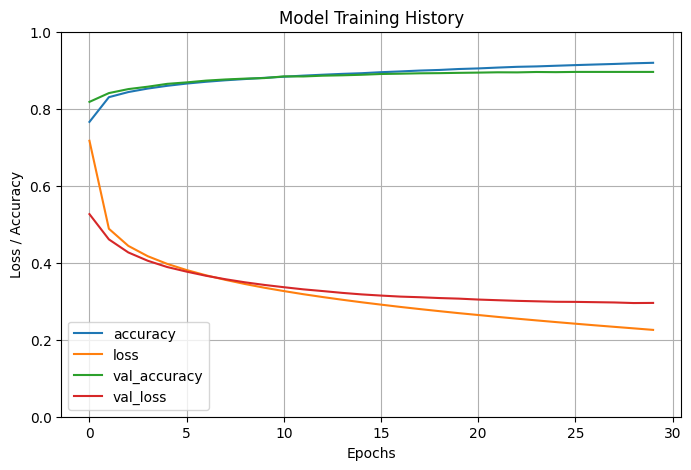


Evaluating on Test Data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.3389
Test Accuracy: 0.8806


In [6]:
# Plotting the learning curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.show()

# Evaluate the model on the unseen test data
print("\nEvaluating on Test Data:")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Predictions for first 3 test images: [9 2 1 1]
Actual labels for first 3 test images: [9 2 1 1]
Predicted classes: ['Ankle boot' 'Pullover' 'Trouser' 'Trouser']


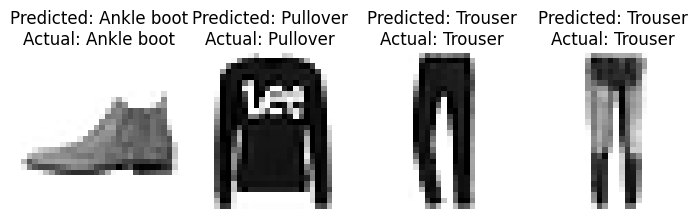

In [7]:
# MAKE PREDICTIONS
X_new = X_test[:4]
y_proba = model.predict(X_new)

y_pred = np.argmax(y_proba, axis=1)
print("\nPredictions for first 3 test images:", y_pred)
print("Actual labels for first 3 test images:", y_test[:4])

predicted_classes = np.array(class_names)[y_pred]
print("Predicted classes:", predicted_classes)

# Display the images with their predicted labels
plt.figure(figsize=(7, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(f"Predicted: {predicted_classes[index]}\nActual: {class_names[y_test[index]]}")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


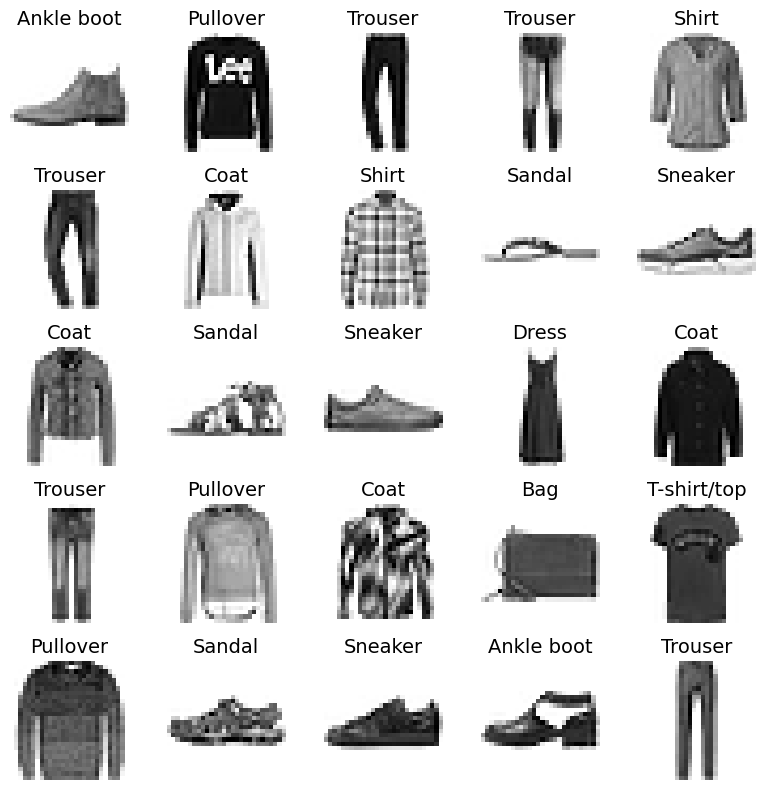

In [9]:
X_new = X_test[:25]
y_proba = model.predict(X_new)

y_pred = np.argmax(y_proba, axis=1)

n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.6, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=14)
plt.tight_layout()
plt.show()